# Arima
Prof. Fernando Amaral

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

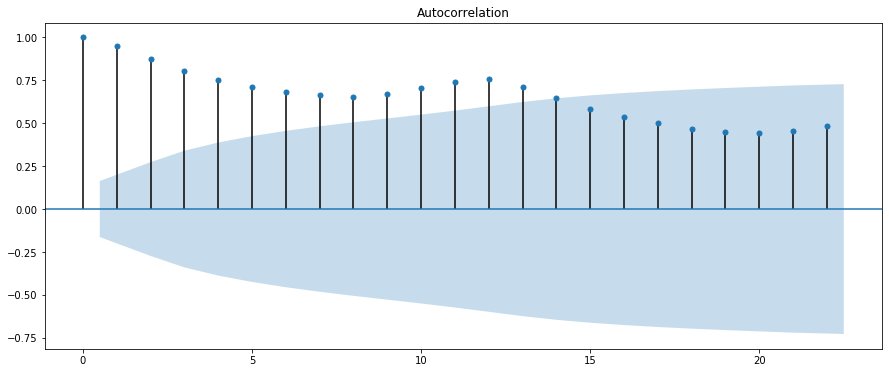

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

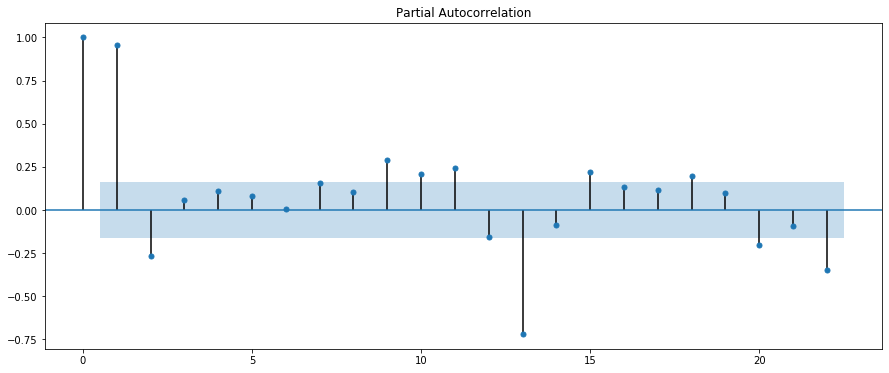

In [11]:
plot_pacf(data)
plt.show()

In [3]:
from statsmodels.tsa.arima_model import ARIMA

In [5]:
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\webma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\webma\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Tue, 05 Nov 2019   AIC                           1361.696
Time:                        09:46:34   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passeng

In [12]:
from pandas import DataFrame

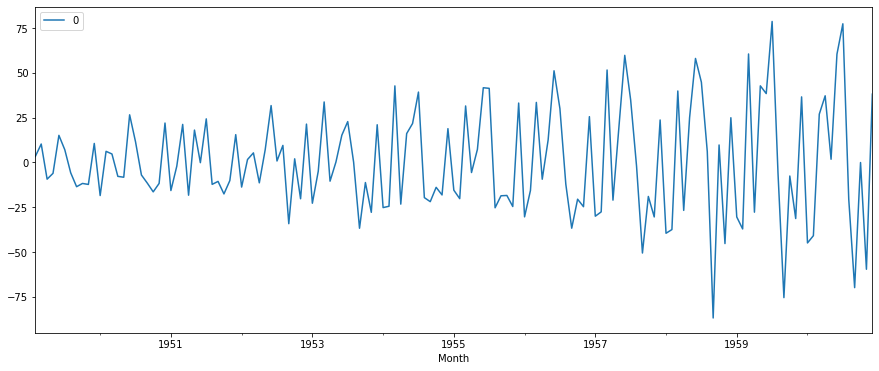

In [13]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

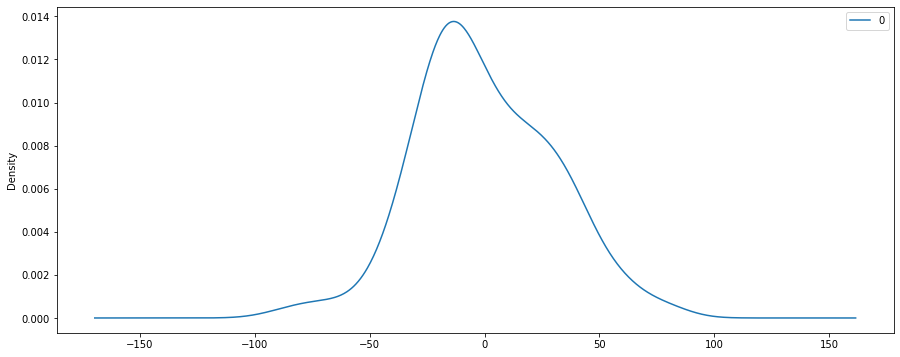

                0
count  143.000000
mean     0.010304
std     29.828333
min    -86.805553
25%    -19.916138
50%     -5.624231
75%     21.573899
max     78.697584


In [14]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [15]:
X = data.values

predicted=383.349047, expected=340.000000
predicted=351.781286, expected=318.000000
predicted=322.739343, expected=362.000000
predicted=372.884414, expected=348.000000
predicted=333.332460, expected=363.000000
predicted=382.493443, expected=435.000000
predicted=435.787786, expected=491.000000
predicted=502.006273, expected=505.000000
predicted=497.701957, expected=404.000000
predicted=347.130149, expected=359.000000
predicted=364.777334, expected=310.000000
predicted=307.297444, expected=337.000000
predicted=394.595001, expected=360.000000
predicted=377.731210, expected=342.000000
predicted=343.945946, expected=406.000000
predicted=419.248029, expected=396.000000
predicted=377.269069, expected=420.000000
predicted=433.784165, expected=472.000000
predicted=462.008914, expected=548.000000
predicted=569.727766, expected=559.000000
predicted=544.074847, expected=463.000000
predicted=418.350448, expected=407.000000
predicted=395.543461, expected=362.000000
predicted=369.154127, expected=405

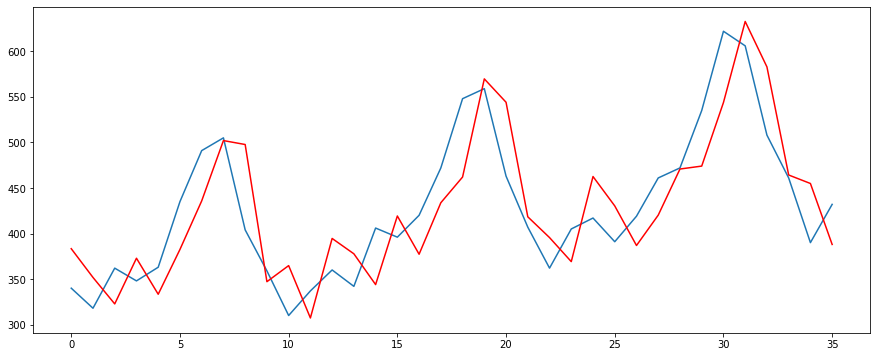

In [16]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()